# Analysis of Hate Crimes In United States
By: Olivia Xie and Divya Koganti

## Introduction
Our tutorial will go through the entire data science pipeline through anlyzing hate crime in the United States. The data science pipeline is data collection, data processing, exploratory & data visualization, analysis & hypothesis testing & ML, and insight & policy decision. 
### Importance
Hate crimes have sadly been part of United States history and continues to be a large part of our present news as well. For example, the more recent wave of hate crimes against asians during the covid pandemic. Another example the black lives matter movement that has been continuously part of our present news. By analyzing the hate crime data, we can help determine trends in hate crimes, provide lawmakers with justification for policies, and show the issues in our communities in relation to hate crimes.
### Background
A hate crime is crime that is motivated by bias against race, religion, disability, sexual orientation, ethnicity, gender or gender identity.


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import statsmodels as sm
from scipy.stats import linregress
import requests
import seaborn as sb
from bs4 import BeautifulSoup
import seaborn as sns


In [132]:
hate_crimes = pd.read_csv("hate_crime.csv")

In [133]:

def classify_bias(bias):
    classification = []
    race_ethnicity_ancestry = ["Anti-White","Anti-Black or African American","Anti-American Indian or Alaska Native","Anti-Asian","Anti-Native Hawaiian or Other Pacific Islander","Anti-Multiple Races, Group","Anti-Arab","Anti-Hispanic or Latino","Anti-Other Race/Ethnicity/Ancestry"]
    religion = ['Anti-Jewish',' Anti-Catholic','Anti-Protestant','Anti-Islamic (Muslim)','Anti-Other Religion','Anti-Multiple Religions, Group','Anti-Mormon','Anti-Jehovah\'s Witness','Anti-Eastern Orthodox (Russian, Greek, Other)','Anti-Other Christian','Anti-Buddhist','Anti-Hindu','Anti-Sikh','Anti-Atheism/Agnosticism/etc.']
    sexual_orientation= ['Anti-Gay (Male)','Anti-Lesbian','Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)','Anti-Heterosexual','Anti-Bisexual']
    disability= ['Anti-Physical','Anti-Mental']
    gender= ['Anti-Male','Anti-Female']
    gender_identity= ['Anti-Transgender','Anti-Gender Non-Conforming']
    #type_of_bias= bias.apply(lambda x: x.split(";"))
    for i in bias:
        if i in race_ethnicity_ancestry:
            classification.append('Race/Ethnicity/Ancestry')
        elif i in religion:
            classification.append('Religion')
        elif i in sexual_orientation:
            classification.append('Sexual Orientation')
        elif i in disability:
            classification.append('Disability')
        elif i in gender:
            classification.append('Gender')
        elif i in gender_identity:
            classification.append('Gender Identity')
        else:
            classification.append('Multiple-Bias Incidents')
    return classification

In [134]:
bias_category = classify_bias(data['BIAS_DESC'])
hate_crimes = hate_crimes.assign(BIAS_CATEGORY= bias_category)
hate_crimes['BIAS_CATEGORY'].value_counts().index


Index(['Race/Ethnicity/Ancestry', 'Religion', 'Sexual Orientation',
       'Multiple-Bias Incidents', 'Gender Identity', 'Gender'],
      dtype='object')

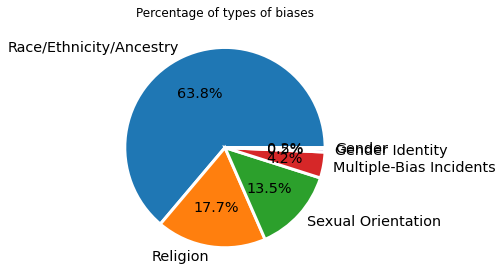

In [135]:
plt.pie(hate_crimes['BIAS_CATEGORY'].value_counts(),labels=hate_crimes['BIAS_CATEGORY'].value_counts().index
,autopct= '%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title("Percentage of types of biases")
plt.tight_layout()

<BarContainer object of 6 artists>

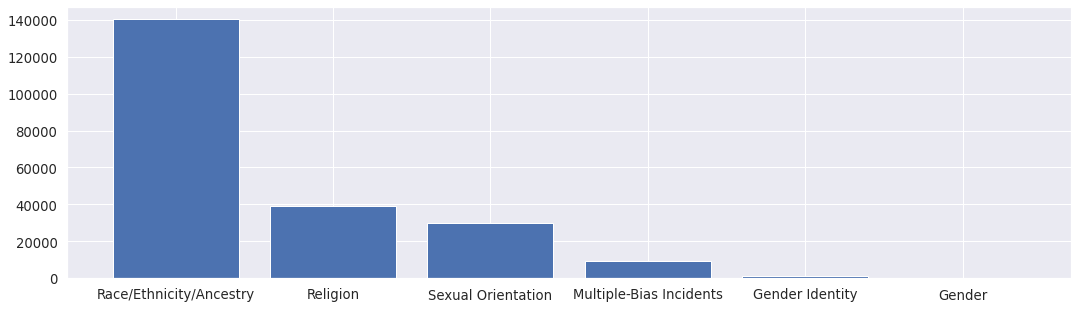

In [145]:
plt.figure(figsize = (18, 5))
plt.bar(hate_crimes['BIAS_CATEGORY'].value_counts().index,hate_crimes['BIAS_CATEGORY'].value_counts())
